# Data Gathering & Transformation
This is set of setps to figure out how the data is comming. It is starting to see the shape of the dataframe

In [45]:
# Libraries
import pandas as pd
from paths_ import Path
import numpy as np

## read dataset

In [46]:
twitter = Path().readfile()

In [47]:
#print(twitter)

## Create dataframe

In [48]:
df_read = pd.read_csv(twitter)
df = df_read.copy(deep=True)

In [49]:
df.shape

(1726, 25)

Then, explore the data of the datafrem visualizing a few lines for example 5 of them randomly

In [50]:
# df.sample(5)

Then, list all the columns to start by recognizing more details

In [51]:
# df.columns

Explore the types of each field

In [52]:
# df.dtypes

Explore some fields like: source, sentiment_value, lang, lat,lng, etc

In [53]:
# df['source'].unique()

### Replace NaN values on numerical fields

In [54]:
class FillNaN:
    def __init__(self,dataframe) -> None:
        self.dataframe = dataframe

    def fill_numerical(self):
        self.numerical_column_list = self.dataframe.dtypes[(self.dataframe.dtypes == 'int64') | (self.dataframe.dtypes == 'float64')].index

        for col in self.numerical_column_list:
            self.dataframe[col].replace(np.nan,0,inplace=True)

        return self.dataframe

In [55]:
replace_null = FillNaN(df).fill_numerical()

Watch the outcome

In [56]:
# df.head(5)

### Split City values into City and country fields

In [57]:
# Split City into City and country
df[['City','country']] = df['City'].str.split(',',1,expand=True)

### Replace invalid location descriptions

In [58]:
df['country'].unique()

array(['Mexico', 'Netherlands', 'Egypt', 'Italy', 'Philippines', 'Spain',
       'Romania', 'Colombia', 'Kenya', 'Denmark', 'New Zealand',
       'Luxembourg', 'Peru', 'Cuba', 'Japan', 'Greece', 'Belize',
       'Dominican Republic', 'Argentina', 'Chile', 'Costa Rica',
       'United States', 'Nigeria', 'Switzerland', 'Poland', 'Ecuador',
       None, 'Hungary', 'South Africa', 'Korea, South', 'Angola',
       'Ireland', 'Germany', 'Sweden', 'Senegal', 'France', 'Finland',
       'Croatia', ' and wild boar', 'Belgium', 'Andorra', 'Bolivia',
       'Hong Kong'], dtype=object)

There is an invalid name:' and wild boar'

In [59]:
df[df['country'] == ' and wild boar']

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,statuses_count,favourites_count,account_created_at,verified,sentiment_value,sentiment_dictionary,lat,lng,City,country
272,8.710000e+17,1.430000e+18,"Aug 9, 2021",NeilSalter4,We use 30 year averages to show climatology (a...,Twitter for Android,0.0,0.0,1,0,...,67556,101844,04/06/2017 13:59,0,-5,AFINN,-2.8974,-79.0045,With my family,and wild boar


These coordinates(-2.8974,-79.0045), belong at Cuenca city in Ecuador. [map](https://www.google.com/maps/place/2%C2%B053'50.6%22S+79%C2%B000'16.2%22W/@-2.8989529,-79.0279408,13.82z/data=!4m4!3m3!8m2!3d-2.8974!4d-79.0045)

In [60]:
df['country'].replace({' and wild boar':'Ecuador'},inplace=True)

In [61]:
df['City'].replace({'With my family':'Cuenca'},inplace=True)

In [62]:
df.loc[272]

user_id                                              871000000000000000.0
status_id                                           1430000000000000000.0
created_at                                                    Aug 9, 2021
screen_name                                                   NeilSalter4
text                    We use 30 year averages to show climatology (a...
source                                                Twitter for Android
reply_to_status_id                                                    0.0
reply_to_user_id                                                      0.0
is_retweet                                                              1
favorite_count                                                          0
retweet_count                                                         679
lang                                                                   en
name                                                          Neil Salter
description             #ecosocialism 

In [63]:
df['country'].unique()

array(['Mexico', 'Netherlands', 'Egypt', 'Italy', 'Philippines', 'Spain',
       'Romania', 'Colombia', 'Kenya', 'Denmark', 'New Zealand',
       'Luxembourg', 'Peru', 'Cuba', 'Japan', 'Greece', 'Belize',
       'Dominican Republic', 'Argentina', 'Chile', 'Costa Rica',
       'United States', 'Nigeria', 'Switzerland', 'Poland', 'Ecuador',
       None, 'Hungary', 'South Africa', 'Korea, South', 'Angola',
       'Ireland', 'Germany', 'Sweden', 'Senegal', 'France', 'Finland',
       'Croatia', 'Belgium', 'Andorra', 'Bolivia', 'Hong Kong'],
      dtype=object)

### Rename column 'lng' to 'lon'

In [64]:
# rename column lng
df = df.rename(columns={'lng':'lon'})

### Format column's date

In [65]:
# format column's date
# df[['account_created_at','created_at']]
df['created_at'] = pd.to_datetime(df['created_at'])
df['account_created_at'] = pd.to_datetime(df['account_created_at'])

In [66]:
# df.dtypes

### source - classification as user or a Bot

The characters "bot" and "Bot", both remain on some source data values. They can be at the begining, at the end or between other characters. For this reason It will be applied regex methods to classify and create a new field that show if the source comes from an User or a Bot.

In [67]:
import re

class User_or_bot:
    def __init__(self):
        self.sourceList = list(df['source'])
        self.is_userList = []
    
    def user_evaluation(self):      
        
        for i in range(0,len(self.sourceList)):
    
            if re.search("bot|Bot",self.sourceList[i]):
                self.is_userList.append('Bot')
            else:
                self.is_userList.append('User')
        
        return self.is_userList

In [68]:
df['user_or_bot'] = User_or_bot().user_evaluation()

In [69]:
df['user_or_bot'].unique()

array(['User', 'Bot'], dtype=object)

### Sentiment_value classification

In [70]:
# aplicar codigo para clasificar los valores de sentiment_value
sentimentList = []
for value in list(df['sentiment_value']):
    if value > 0:
        sentimentList.append('Positive') 
    elif value < 0:
        sentimentList.append('Negative') 
    else:
        sentimentList.append('Neutral') 

In [71]:
# print(sentimentList)
df['sentiment'] = sentimentList

In [72]:

df['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [73]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,account_created_at,verified,sentiment_value,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment
853,1.320000e+18,1.430000e+18,2021-08-31,baddietamal,"solo falta la ssd y el almacenamiento, me sien...",Twitter for iPhone,0.0,0.0,0,5,...,2020-10-16 07:13:00,0,-1,AFINN,34.7500,135.4601,Ōsaka,Japan,User,Negative
460,1.350000e+18,1.430000e+18,2021-08-27,Loise_Nyambura_,We use 30 year averages to show climatology (a...,Twitter for Android,0.0,0.0,1,0,...,2021-05-01 03:52:00,0,0,AFINN,58.4546,-134.1739,Juneau,United States,User,Neutral
108,2.728621e+09,1.430000e+18,2021-08-15,DD_Bun_,Premium Generative Art T-Shirt 001 https://t.c...,dd_bun_,0.0,0.0,0,0,...,2014-08-13 05:18:00,0,0,AFINN,50.8725,20.6319,Kielce,Poland,User,Neutral


### Year - Month

In [74]:
def year():
    year = []
    for y in df['created_at'].astype(str):
        year.append(y[:4])
        
    return year
    

In [75]:
df['year'] = year()

In [76]:
def month():
    monthNum = []
    for m in df['created_at'].astype(str):
        monthNum.append(m[5:7])
                
    return monthNum

In [78]:
df['month_num'] = month()

In [79]:
df['month'] = df['month_num'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [80]:
# df['created_at'].unique()

In [81]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment,year,month_num,month
1159,4.828750e+08,1.430000e+18,2021-08-04,P_risks,Chi investe di più in #ricerca e sviluppo nel ...,Twitter for Android,0.0,0.0,1,0,...,AFINN,10.7500,121.9500,San Jose,Philippines,User,Positive,2021,08,August
1403,8.310000e+17,1.430000e+18,2021-08-28,regioneFVGit,📰 È online da oggi il nuovo numero del notizia...,Twitter Web App,0.0,0.0,1,0,...,AFINN,18.9186,-99.2342,Cuernavaca,Mexico,User,Negative,2021,08,August
148,1.130000e+18,1.430000e+18,2021-08-07,xaelbot,Infographic: What Is Data Science? A Beginner’...,xael bot,0.0,0.0,1,0,...,AFINN,48.1147,-1.6794,Rennes,France,Bot,Neutral,2021,08,August


### Is retweet
Replace values 0,1 to False and True

In [82]:
df['is_retweet'] = df['is_retweet'].replace({0:False,1:True})

In [83]:
df['is_retweet'].unique()

array([False,  True])

In [84]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment,year,month_num,month
500,96350647.0,1.430000e+18,2021-08-17,PeterG4NES2019,We use 30 year averages to show climatology (a...,Twitter Web App,0.0,0.0,True,0,...,AFINN,63.1775,14.6414,Östersund,Sweden,User,Positive,2021,08,August
833,380563976.0,1.430000e+18,2021-08-15,octavioq116,¿Habrá alguien que le crea a estos idiotas que...,Twitter for Android,0.0,0.0,True,0,...,AFINN,46.5833,26.9167,Bacău,Romania,User,Neutral,2021,08,August
658,55594098.0,1.430000e+18,2021-08-21,AdrianSolca,Chulada de facilitación gráfica de mi plática ...,Twitter Web App,0.0,0.0,False,8,...,AFINN,30.5667,31.5000,Az Zaqāzīq,Egypt,User,Negative,2021,08,August


## Standarization of Retweet and Favorite
In order to standardize values, score should be calculated for Retweet and Favorite :
* Score Retweet: ([retweet_count]-[Retweet_MIN])/([Retweet_MAX]-[Retweet_MIN])
* Score Favorite: ([favorite_count]-[Favorite_MIN])/([Favorite_MAX]-[Favorite_MIN])

In [85]:
retween_min = df['retweet_count'].min()

In [86]:
retween_max = df['retweet_count'].max()

In [87]:
df['score_retweet'] = (df['retweet_count'] - retween_min) / (retween_max - retween_min) 

In [88]:
favorite_min = df['favorite_count'].min()

In [89]:
favorite_max = df['favorite_count'].max()

In [90]:
df['score_favorite'] = (df['favorite_count'] - favorite_min) / (favorite_max - favorite_min)

In [91]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,lon,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite
289,1.430000e+18,1.430000e+18,2021-08-13,ASAimaging,ggseg version 1.6.4 is on github. CRAN re-subm...,Twitter Web App,0.0,0.0,True,0,...,30.9000,Shibīn al Kawm,Egypt,User,Positive,2021,08,August,0.001991,0.0
1145,3.053979e+09,1.430000e+18,2021-08-20,ElenaOrsi76,Bella la nuova grafica di Twitter. Io proporre...,Twitter for iPhone,0.0,0.0,True,0,...,-68.5364,San Juan,Argentina,User,Positive,2021,08,August,0.013939,0.0
1684,1.350000e+18,1.420000e+18,2021-08-31,yasuohasagi18,Si le taux de croissance actuel des doses obli...,Twitter for Android,0.0,0.0,True,0,...,23.1667,Białystok,Poland,User,Neutral,2021,08,August,0.021505,0.0


In [92]:
df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'is_retweet',
       'favorite_count', 'retweet_count', 'lang', 'name', 'description',
       'followers_count', 'friends_count', 'statuses_count',
       'favourites_count', 'account_created_at', 'verified', 'sentiment_value',
       'sentiment_dictionary', 'lat', 'lon', 'City', 'country', 'user_or_bot',
       'sentiment', 'year', 'month_num', 'month', 'score_retweet',
       'score_favorite'],
      dtype='object')

In [93]:
df = df.sort_values('score_retweet',ascending=False)

## Send the normalized dataset to a new csv file

Once the dataframe is cleaned and normalized, it will be send as a new excel file.

In [94]:
# df.to_excel('twitter_clean_data.xlsx',index=False)

# Preliminary Charts

## Tweet distribution by language

In [104]:
import matplotlib.pyplot as plt

In [100]:
# distribution of the tweets by language
tweet_lang = pd.DataFrame(df.groupby('lang',as_index=False)['text'].count())

In [101]:
tweet_lang['lang'] = tweet_lang['lang'].replace({'cy':'Welsh','en':'English','es':'Spanish','fr':'French','it':'Italian','pt':'Portuguese'})

In [102]:
tweet_lang = tweet_lang.sort_values('text',ascending=False)
tweet_lang

,lang,text
1,English,491
2,Spanish,479
4,Italian,442
3,French,312
0,Welsh,1
5,Portuguese,1


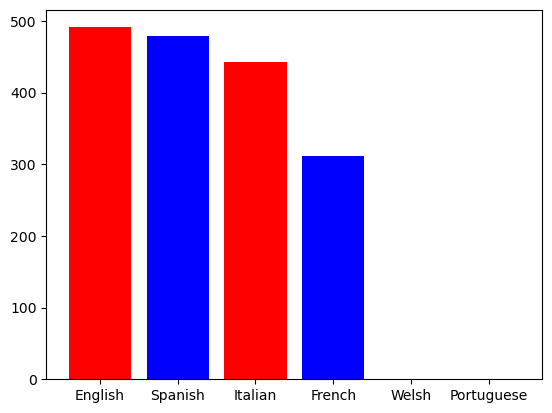

In [105]:
# distribution of the tweets by language
plt.bar(tweet_lang['lang'],tweet_lang['text'], color=['r','b'])
plt.show()

## Geographical distribution 

### Creation of geometry by coordinates (lat,lon)

In [106]:
import geopandas as gpd

In [107]:
gdf_read = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat))

In [108]:
gdf = gdf_read.copy(deep=True)

In [109]:
gdf.head(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite,geometry
712,1.370000e+18,1.430000e+18,2021-08-23,carmen_borbaran,La Clínica Las Condes demandando a su ex direc...,Twitter for iPhone,0.0,0.0,True,0,...,Gävle,Sweden,User,Positive,2021,08,August,1.000000,0.0,POINT (17.16660 60.66700)
308,8.980000e+17,1.430000e+18,2021-08-29,GadioOumoul,We analyzed air quality data gathered by the @...,Twitter Web App,0.0,0.0,True,0,...,Castlebar,Ireland,User,Positive,2021,08,August,0.990442,0.0,POINT (-9.30000 53.85000)
67,1.340000e+18,1.430000e+18,2021-08-06,iPythonistaBot,We analyzed air quality data gathered by the @...,Pythonista Bot,0.0,0.0,True,0,...,Miskolc,Hungary,Bot,Negative,2021,08,August,0.990442,0.0,POINT (20.78330 48.10000)


## Distribution of tweets in Mexico 

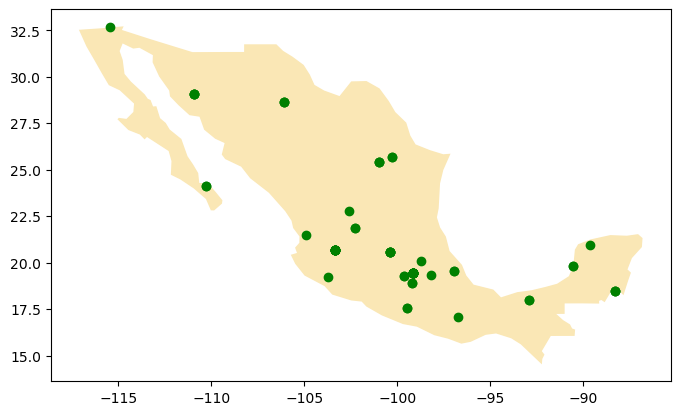

In [111]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries[countries["name"] == "Mexico"].plot(color="#fae7b5", ax=ax)

# plot points
gdf[gdf['country'] == 'Mexico'].plot(color='g',ax=ax)

plt.show()

## Conclusion

For the Data Gathering & Transformation process, it was:
* Replaced NaN values from the dataset
* Formatted columns's date: created_at and account_created_at. Created new fields that stores year and month data
* Created the filter *user_or_bot* by identifying the tweet's source type taken the source field as an input
* Split City values into City and country fields
* Replaced a one invalid location description, located at Ecuador
* Renamed the column 'lng' to 'lon' to create the geometry 
* Created a sentiment classification by Positive, Negative and Neutral taken Sentiment_value field as an input
* Setted booleans in the is_retweet field
* It was normalized the values of retweet_count and favorite_count
* It was created a new dataset with the previuos outcomes.
* Created a bar chart to visualize the distribution of tweets by language
* Created a geographical chart to visualize the distribution of tweets created in Mexico

# Next Step

Go to Tableau and plot data by recreating the required dashboard

[Tableau Dashboard](https://public.tableau.com/app/profile/ricardosaldivar/viz/ConferenceCandidates/Dashboard1?publish=yes)

## References

- [The easiest way to plot data from Pandas on a world map](https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3)
- [Creating a GeoDataFrame from a DataFrame with coordinates](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html)
- [Mapping and Plotting Tools](https://geopandas.org/en/stable/docs/user_guide/mapping.html)
- [ISO Language Code Table](http://www.lingoes.net/en/translator/langcode.htm)